# 数据探索性分析与数据预处理
## 1. 数据可视化和摘要
### 数据摘要

* 读入数据，并识别缺失值

In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy.stats as spss
import seaborn as sns
# 导入相关库

In [4]:
def converter(x):
    """
    数据预处理，用于将缺失值转化为Nan，便于后续统计
    """
    x = json.loads(x)
    if not x:
        x = np.nan
    
    return x

converters = {
    "census_block_group": lambda x: str(x) if x else np.nan,  # 因为这是unique id，有前置0位，所以转化为string处理
    "visitor_home_cbgs": converter,  # 使用自定义转换器
    "visitor_work_cbgs": converter, 
    "related_same_day_brand": converter,
    "related_same_month_brand": converter,
    "top_brands": converter,
    "popularity_by_hour": converter,
    "popularity_by_day": converter
}

dataset = pd.read_csv("data.csv", converters=converters)

In [19]:
dataset.tail()  # 可以看到所有的缺失值都被转化为了Nan，方便后续统计

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220730,480579900000,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220731,361190056001,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220732,260339803001,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220733,150079902000,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220734,NaN,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* 标称属性的统计

In [23]:
dataset.head()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,010059508001,1538352000,1541030400,75122.0,18314.0,"{'010059501003': 127, '010059509001': 111, '01...","{'010059501003': 109, '010810407002': 62, '010...",194724.0,"[Chick-fil-A, mcdonalds, Marathon Petroleum, w...","[walmart, mcdonalds, Dollar General, Chick-fil...","[CrossFit, Health Mart, Coldwell Banker]","[2617, 2457, 2403, 2519, 2646, 3007, 3886, 756...","{'Monday': 12000, 'Tuesday': 12224, 'Wednesday..."
1,010090506011,1538352000,1541030400,95649.0,38942.0,"{'010730113021': 210, '010090506022': 205, '01...","{'010890111001': 271, '010730045001': 269, '01...",120587.0,"[Shell Oil, mcdonalds, Chick-fil-A, Chevron]","[walmart, mcdonalds, Shell Oil, Chick-fil-A, D...",NaN,"[6556, 6325, 6222, 6355, 6586, 7350, 8568, 809...","{'Monday': 12125, 'Tuesday': 12984, 'Wednesday..."
2,010479572002,1538352000,1541030400,14009.0,3039.0,"{'010479567011': 67, '010479567021': 60}",{'010479567021': 52},67774.0,[Dollar General],"[walmart, Dollar General, mcdonalds, Chevron, ...",[Dollar General],"[807, 790, 796, 786, 851, 951, 1134, 1797, 135...","{'Monday': 2314, 'Tuesday': 2340, 'Wednesday':..."
3,010690404001,1538352000,1541030400,128169.0,25418.0,"{'010690402013': 370, '010690402011': 322, '01...","{'010690402024': 313, '010690415004': 203, '01...",42684.0,"[Chick-fil-A, Sam's Club, Dollar General, walm...","[walmart, Dollar General, mcdonalds, Marathon ...","[Chick-fil-A, Sam's Club, Olive Garden, mcdona...","[2121, 1828, 1784, 1704, 1861, 2373, 3730, 749...","{'Monday': 21141, 'Tuesday': 21143, 'Wednesday..."
4,010730112101,1538352000,1541030400,51453.0,9499.0,"{'010090507001': 183, '010730113021': 167, '01...","{'010730045001': 140, '010730027001': 123, '01...",18878.0,"[Chevron, Daylight Donuts, walmart]","[walmart, Chevron, Dollar General, Shell Oil, ...","[Chevron, CrossFit]","[3804, 3716, 3686, 3672, 3735, 4115, 4855, 594...","{'Monday': 8402, 'Tuesday': 8414, 'Wednesday':..."


In [67]:
nominal_attributes = ['visitor_home_cbgs', 'visitor_work_cbgs', 'related_same_day_brand', 'related_same_month_brand', 'top_brands']  # 选择标称属性
count_result = defaultdict(defaultdict(int).copy)  # 双重defaultdict嵌套，可以省略后续对于键值的判断

# 统计标称属性
for attribute in nominal_attributes:
    data_coloumn = dataset[attribute]  # Series类型，对应的数据列
    
    for item in data_coloumn:
        if isinstance(item, dict):  # 如果是dict类型，则统计值
            for key, value in item.items():
                count_result[attribute][key] += value
        elif isinstance(item, list):  # 如果是list类型，则统计次数
            for key in item:
                count_result[attribute][key] += 1

# 打印部分结果
for attribute, values in count_result.items():
    # print(f"{attribute:^30} : {values}.")
    # 不能直接打印输出，容易造成缓冲区溢出
    print(f"{attribute:^30} : first value of result is {list(values.keys())[0]}: {values[list(values.keys())[0]]}.")


      visitor_home_cbgs        : first value of result is 010059501003: 1389.
      visitor_work_cbgs        : first value of result is 010059501003: 2499.
    related_same_day_brand     : first value of result is Chick-fil-A: 8910.
   related_same_month_brand    : first value of result is walmart: 164347.
          top_brands           : first value of result is CrossFit: 4392.


> 以上是对标称属性的全部统计，最终结果存储在`count_result`中，但是不推荐直接打印输出，受notebook本身的内存限制，容易造成缓冲区溢出，所以只打印开头几个数值以示结果，如果需要查验，可以对count_result进行遍历。

In [115]:
numeric_attributes = ['date_range_start', 'date_range_end', 'raw_visit_count', 'raw_visitor_count', 'distance_from_home', 'popularity_by_hour', 'popularity_by_day']
appended_dataset = dataset[numeric_attributes].copy()  #复制一份数据集，以免对原数据集的修改出错
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for hour in range(24):
    appended_dataset[f'hour_{hour}'] = appended_dataset.apply(lambda x: np.nan if isinstance(x['popularity_by_hour'], type(np.nan)) else x['popularity_by_hour'][hour], axis=1)

for weekday in weekdays:
    appended_dataset[weekday] = appended_dataset.apply(lambda x: np.nan if isinstance(x['popularity_by_day'], type(np.nan)) else x['popularity_by_day'][weekday], axis=1)

appended_dataset.describe()  # 分位数等数据特征打印

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home,hour_0,hour_1,hour_2,hour_3,hour_4,...,hour_21,hour_22,hour_23,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,2.207350e+05,2.207350e+05,2.206290e+05,2.206290e+05,2.205180e+05,220629.000000,220629.000000,220629.000000,220629.000000,220629.000000,...,220629.000000,220629.000000,220629.000000,2.206290e+05,2.206290e+05,220629.000000,220629.000000,220629.000000,220629.000000,220629.000000
mean,1.538352e+09,1.541030e+09,4.793066e+04,1.182032e+04,3.511280e+04,2257.997552,2120.118615,2061.134751,2049.411578,2143.377534,...,3160.051349,2797.167045,2491.503334,7.465803e+03,7.609147e+03,7530.830512,6307.621033,6991.368528,6368.928237,5656.961111
std,0.000000e+00,0.000000e+00,6.252655e+04,3.045832e+04,9.973193e+04,2803.436153,2651.058966,2581.994313,2554.635219,2562.014265,...,3520.626740,3219.375910,2975.346044,1.016569e+04,1.003068e+04,9450.043780,8192.867696,8841.321478,8426.977948,7825.378394
min,1.538352e+09,1.541030e+09,6.000000e+01,5.000000e+01,7.060000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.538352e+09,1.541030e+09,1.704200e+04,3.430000e+03,8.584000e+03,1115.000000,1059.000000,1033.000000,1024.000000,1053.000000,...,1457.000000,1324.000000,1206.000000,2.665000e+03,2.712000e+03,2694.000000,2221.000000,2454.000000,2204.000000,1988.000000
50%,1.538352e+09,1.541030e+09,3.064000e+04,6.541000e+03,1.461400e+04,1706.000000,1611.000000,1567.000000,1556.000000,1614.000000,...,2304.000000,2067.000000,1861.000000,4.797000e+03,4.903000e+03,4868.000000,4036.000000,4455.000000,3959.000000,3513.000000
75%,1.538352e+09,1.541030e+09,5.667800e+04,1.309900e+04,3.139775e+04,2678.000000,2512.000000,2439.000000,2428.000000,2548.000000,...,3756.000000,3319.000000,2957.000000,8.826000e+03,9.040000e+03,8982.000000,7484.000000,8314.000000,7429.000000,6527.000000
max,1.538352e+09,1.541030e+09,7.179900e+06,6.113949e+06,6.297845e+06,408076.000000,414620.000000,415050.000000,423863.000000,389655.000000,...,377200.000000,379644.000000,396279.000000,1.323997e+06,1.209115e+06,953888.000000,950061.000000,894701.000000,898361.000000,949777.000000


In [116]:
appended_dataset.isna().sum()  # 打印缺失值统计结果

date_range_start        0
date_range_end          0
raw_visit_count       106
raw_visitor_count     106
distance_from_home    217
popularity_by_hour    106
popularity_by_day     106
hour_0                106
hour_1                106
hour_2                106
hour_3                106
hour_4                106
hour_5                106
hour_6                106
hour_7                106
hour_8                106
hour_9                106
hour_10               106
hour_11               106
hour_12               106
hour_13               106
hour_14               106
hour_15               106
hour_16               106
hour_17               106
hour_18               106
hour_19               106
hour_20               106
hour_21               106
hour_22               106
hour_23               106
Monday                106
Tuesday               106
Wednesday             106
Thursday              106
Friday                106
Saturday              106
Sunday                106
dtype: int64

> 以上是对于所有数值属性的展开统计结果，思路是创建一个数据集副本，对popularity_by_hour以及popularity_by_day进行展开，得到一个多列的DataFrame结构，然后利用DataFrame自带的describe函数进行求值操作，打印即为实验要求。
> 这样操作的好处是结果清晰可见，并对原数据集没有破坏，但是时间效率较慢，因为涉及对行中各元素的操作

* 数据可视化


> 考虑到数值属性较多，所以这里仅考虑`raw_visit_count`，`raw_visitor_count`及`distance_from_home`这三个有意义的属性

C:\Users\34281\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


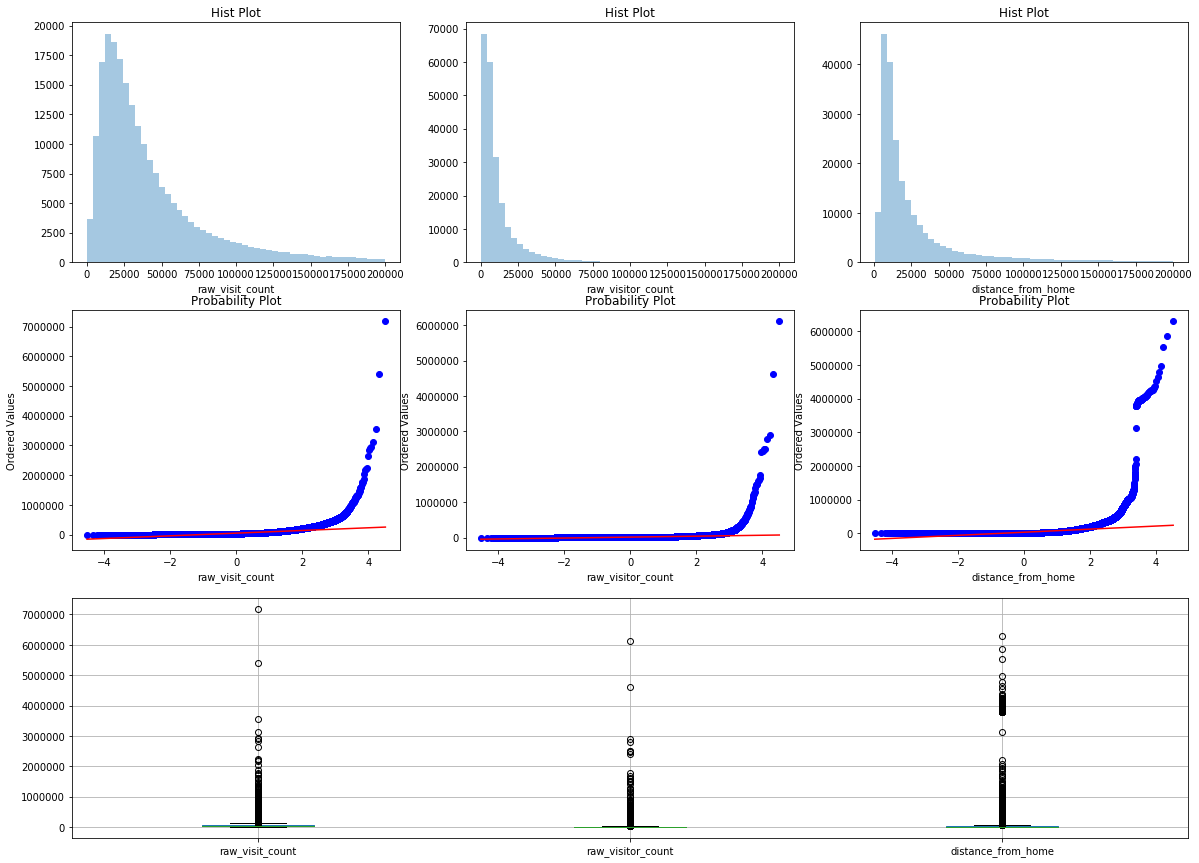

In [154]:
numeric_attributes = ['raw_visit_count', 'raw_visitor_count', 'distance_from_home']
fig = plt.figure()
fig.set_size_inches(20, 15)

for index, attribute in enumerate(numeric_attributes):
    series = dataset[attribute].dropna()
    modify_series = series[(series<200000)]
    
    hist = fig.add_subplot(3, len(numeric_attributes), index + 1, xlabel=attribute, title="Hist Plot")
    sns.distplot(modify_series, ax=hist, kde=False)
    
    proq = fig.add_subplot(3, len(numeric_attributes), index + 1 + len(numeric_attributes))
    spss.probplot(series, plot=proq)
    proq.set_xlabel(attribute)

box_data = dataset[numeric_attributes]
box = fig.add_subplot(3, 3, (7, 9))
box_data.boxplot(ax=box)

> 在最初的处理过程中，直方图不论bins大小为多少，这三个参数的分布都过于集中，观察其分位数以后，发现受一部分离群值影响，导致直方图范围过大。所以在实际
> 处理时，对数据进行了过滤操作，在排除离群点干扰的情况下，得到如上直方图。另外，从上述Q-Q图可以发现，在排除部分离群点干扰的情况下，数据整体分布**符合正态分布**。
> 另外，从盒图中也可以看出，数据分布相对集中，离群点主要分布在较大数值的位置，以`raw_visit_count`为例，离群点为700000及550000这两个点，可以非常明显的区分出来。

## 2. 缺失数据的处理

In [10]:
dataset.isnull().sum()  # 缺失值

census_block_group              1
date_range_start                0
date_range_end                  0
raw_visit_count               106
raw_visitor_count             106
visitor_home_cbgs           28412
visitor_work_cbgs           51152
distance_from_home            217
related_same_day_brand      35542
related_same_month_brand     2983
top_brands                  74540
popularity_by_hour            106
popularity_by_day             106
dtype: int64

In [19]:
def read_null(attribute):
    return dataset[dataset[attribute].isna()]

In [20]:
read_null('census_block_group')

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220734,NaN,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> `census_block_group`作为数据类似主键的存在，仅缺失一次，可能是数据录入出错导致

In [21]:
read_null("raw_visit_count").head()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220629,260539900000,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220630,691209900000,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220631,720579926000,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220632,020600001002,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220633,360039402001,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`raw_visit_count`以及`raw_visitor_count`分别对应每日访问量和每日访问人数统计，缺失原因一方面可能是这些地区在统计时间段内没有人来访，另一方面可能是统计出错。

In [22]:
read_null("visitor_home_cbgs").head()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
9,040019443002,1538352000,1541030400,5102.0,1558.0,NaN,NaN,342203.0,"[Burger King US, ConocoPhillips, SUBWAY, Chevr...","[walmart, Chevron, Shell Oil, Denny's, mcdonal...",[ConocoPhillips],"[755, 729, 701, 661, 640, 686, 660, 716, 716, ...","{'Monday': 742, 'Tuesday': 748, 'Wednesday': 7..."
42,060750218003,1538352000,1541030400,9343.0,3593.0,NaN,NaN,5326.0,"[Safeway, Shell Oil]","[Safeway, starbucks, Chevron, Costco Wholesale...",NaN,"[535, 478, 518, 473, 451, 471, 569, 1046, 1154...","{'Monday': 1453, 'Tuesday': 1603, 'Wednesday':..."
81,131210080003,1538352000,1541030400,9051.0,2267.0,NaN,NaN,9347.0,"[Kroger, Chevron, Wendy's, BP, mcdonalds, Fami...","[Chevron, walmart, Shell Oil, mcdonalds, QuikT...",NaN,"[1022, 978, 941, 950, 971, 957, 950, 1133, 102...","{'Monday': 1372, 'Tuesday': 1400, 'Wednesday':..."
91,160179501001,1538352000,1541030400,4267.0,1485.0,NaN,NaN,84448.0,"[walmart, starbucks, ConocoPhillips, TownPump ...","[ConocoPhillips, walmart, Exxon Mobil, Safeway...","[United States Postal Service (USPS), Do It Best]","[671, 706, 692, 672, 691, 689, 745, 819, 788, ...","{'Monday': 856, 'Tuesday': 601, 'Wednesday': 5..."
99,170730302025,1538352000,1541030400,9835.0,1564.0,NaN,NaN,24485.0,"[Dollar General, Phillips 66, Casey's General ...","[Casey's General Stores, BP, walmart, Dollar G...","[Phillips 66, Dollar General, SUBWAY, BP, Heal...","[1009, 976, 972, 946, 975, 1071, 1196, 1360, 1...","{'Monday': 1544, 'Tuesday': 1603, 'Wednesday':..."


`visitor_home_cbgs`及`visitor_work_cbgs`的缺失，可能是人们出于隐私安全考虑，在数据统计时没有提供，另一方面，可能一部分没有工作的人`visitor_work_cbgs`字段为空

`top_brands`数据缺失最为严重，一方面可能是所属`cbg`内并没有大型商场，另一方面考虑数据收集时提供了不完整的信息。其他属性的缺失理由同上。

### 缺失值处理策略

* 将缺失部分剔除

In [9]:
clear_dataset_1 = dataset.dropna()

In [106]:
clear_dataset_1.isna().sum()

census_block_group          0
date_range_start            0
date_range_end              0
raw_visit_count             0
raw_visitor_count           0
visitor_home_cbgs           0
visitor_work_cbgs           0
distance_from_home          0
related_same_day_brand      0
related_same_month_brand    0
top_brands                  0
popularity_by_hour          0
popularity_by_day           0
dtype: int64

* 用最高频率值来填补缺失值

In [6]:
def fill_with_mode(series):
    if series.dtype == 'O':
        mode = series.dropna().apply(json.dumps).mode()[0]
    
    else:
        mode = series.mode()[0]
    
    print(f"Mode of column {series.name} is: {mode}")
    return series.fillna(mode)

In [7]:
clear_dataset_2 = dataset.apply(fill_with_mode)
clear_dataset_2.isna().sum()

Mode of column census_block_group is: "010010201001"
Mode of column census_block_group is: "010010201001"
Mode of column date_range_start is: 1538352000
Mode of column date_range_end is: 1541030400
Mode of column raw_visit_count is: 24531.0
Mode of column raw_visitor_count is: 2292.0
Mode of column visitor_home_cbgs is: {"060750601001": 57}
Mode of column visitor_work_cbgs is: {"170318391001": 53}
Mode of column distance_from_home is: 8345.0
Mode of column related_same_day_brand is: ["Dunkin' Donuts"]
Mode of column related_same_month_brand is: ["SmartStyle Family Hair Salons"]
Mode of column top_brands is: ["United States Postal Service (USPS)"]
Mode of column popularity_by_hour is: [0, 0, 0, 0, 1, 1, 2, 22, 32, 37, 26, 25, 19, 23, 17, 10, 11, 10, 5, 7, 7, 2, 3, 5]
Mode of column popularity_by_day is: {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 83, "Friday": 0, "Saturday": 0, "Sunday": 0}


census_block_group          0
date_range_start            0
date_range_end              0
raw_visit_count             0
raw_visitor_count           0
visitor_home_cbgs           0
visitor_work_cbgs           0
distance_from_home          0
related_same_day_brand      0
related_same_month_brand    0
top_brands                  0
popularity_by_hour          0
popularity_by_day           0
dtype: int64

> 以上即为打印结果，对于list及dict对象使用json.dumps函数将其转化为字符串，便于比较归类，得出众数

* 使用属性之间的相关关系填补缺失值

> 找出具有相似属性的群组，取其平均值填入缺失对象之中，但是在这个场景下并不适用，因为确实数据中，有相当占比的数据仅有取值时间的范围，缺少其他相关属性的判别
> 而且采样时间和缺失值之间缺少明显的相关关系，所以无法使用这类方法进行缺失值填补，或填补得到的缺失值缺乏合理性。

In [74]:
test_dataset = dataset.dropna()
test_dataset.corr()

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home
date_range_start,NaN,NaN,NaN,NaN,NaN
date_range_end,NaN,NaN,NaN,NaN,NaN
raw_visit_count,NaN,NaN,1.000000,0.901485,0.091015
raw_visitor_count,NaN,NaN,0.901485,1.000000,0.175434
distance_from_home,NaN,NaN,0.091015,0.175434,1.000000


> 可以看到，上述数据集中，date_range_start以及date_range_end这两个属性和其他属性之间没有相关性，因为所有数据的采样时间范围都是一致的
> 综上，属性之间的相关性无法处理该数据集中的缺失值(这部分缺失值仅有采样时间范围，没有任何其他属性)

* 数据可视化对比

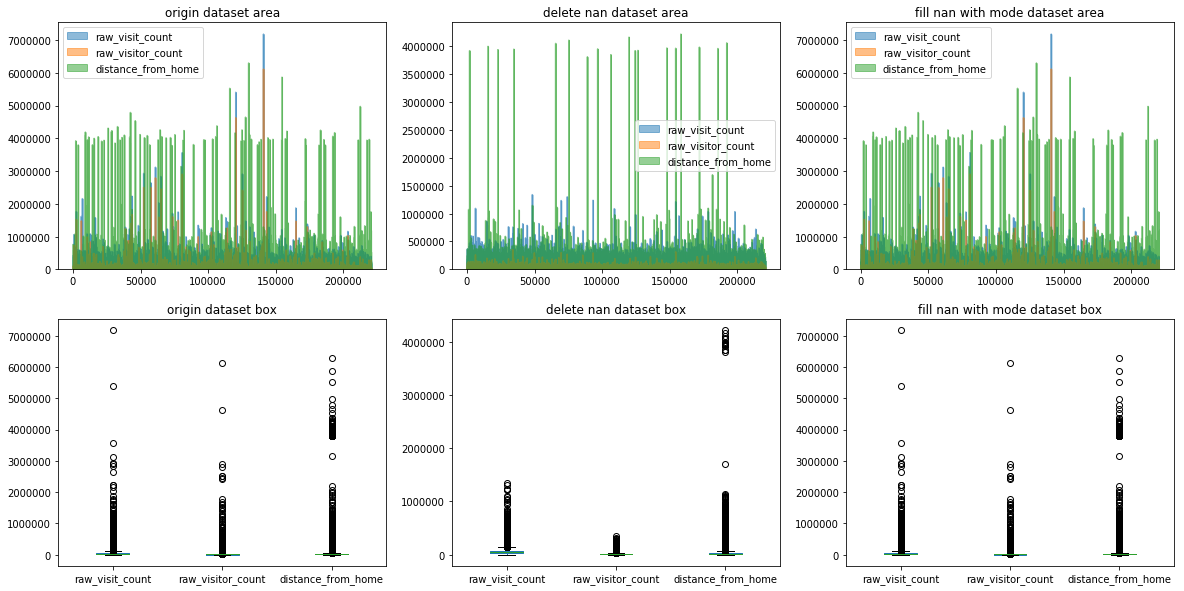

In [154]:
columns = ['raw_visit_count', 'raw_visitor_count', 'distance_from_home']
fig = plt.figure()
fig.set_size_inches(20, 10)
ax = fig.add_subplot(2, 3, 1, title="origin dataset area")
dataset[columns].plot.area(stacked=False, ax=ax)
ax = fig.add_subplot(2, 3, 2, title="delete nan dataset area")
clear_dataset_1[columns].plot.area(stacked=False, ax=ax)
ax = fig.add_subplot(2, 3, 3, title="fill nan with mode dataset area")
clear_dataset_2[columns].plot.area(stacked=False, ax=ax)

ax = fig.add_subplot(2, 3, 4, title="origin dataset box")
dataset[columns].plot.box(ax=ax)
ax = fig.add_subplot(2, 3, 5, title="delete nan dataset box")
clear_dataset_1[columns].plot.box(ax=ax)
ax = fig.add_subplot(2, 3, 6, title="fill nan with mode dataset box")
clear_dataset_2[columns].plot.box(ax=ax)

> 上图中，分别是原数据集、删除缺失值的数据集以及用众数填充的数据集，所得到的区域图及盒图。可以明显看到，删除缺失值以后的数据集离群点明显减少，我们可以推断离群点大部分都有一定属性的缺失，
> 而使用众数填充的数据集则呈现和原数据集相似的特性，这点在区域图中也得到了体现。

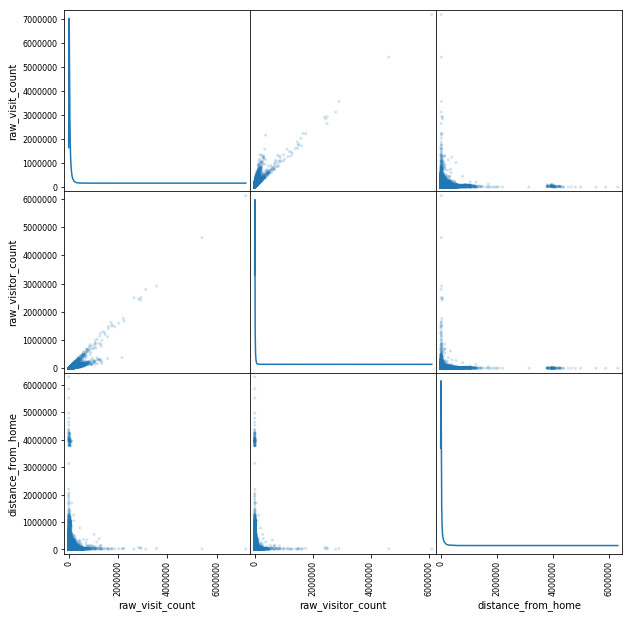

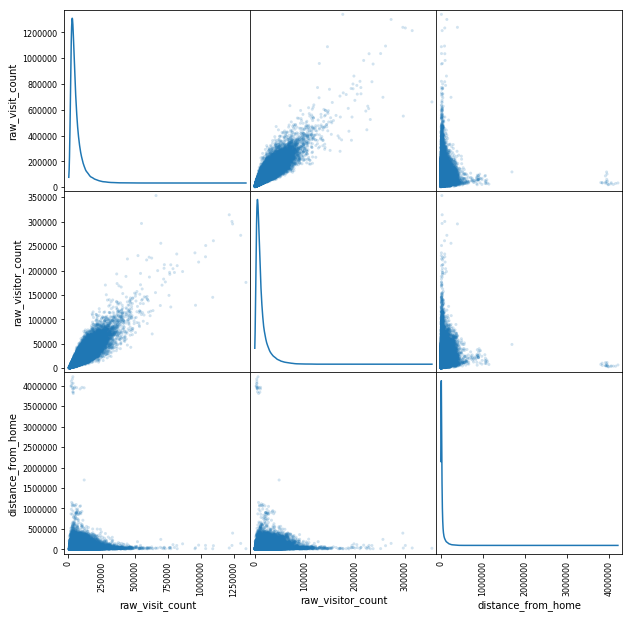

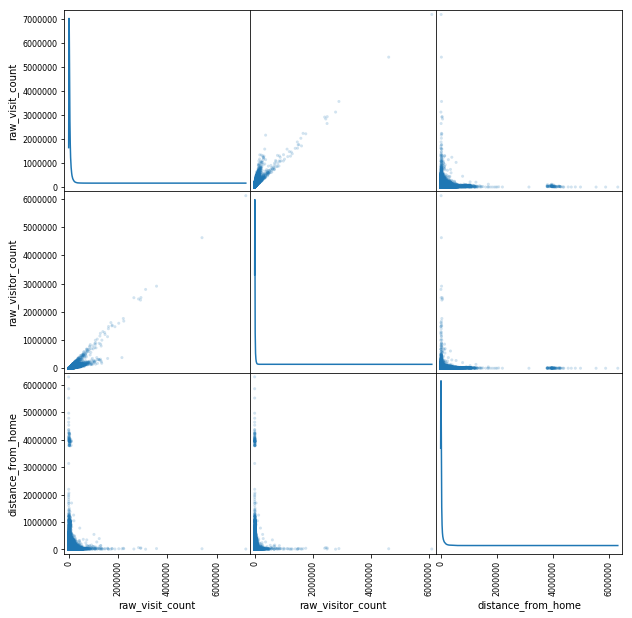

In [8]:
from pandas.plotting import scatter_matrix
columns = ['raw_visit_count', 'raw_visitor_count', 'distance_from_home']

axes_1 = scatter_matrix(dataset[columns],alpha=0.2, figsize=(10, 10), diagonal='kde')
axes_2 = scatter_matrix(clear_dataset_1[columns],alpha=0.2, figsize=(10, 10), diagonal='kde')
axes_3 = scatter_matrix(clear_dataset_2[columns],alpha=0.2, figsize=(10, 10), diagonal='kde')

> 以上是原数据集及两个处理以后数据集的散点矩阵图，每个图的对角线是数据分布的概率密度曲线，从图中可以看到三个属性之间的相关性分布及分布密集程度。特别关注的是删除空值以后的数据集
> 能明显看出和其他数据集的区别，是部分极大值点由于个别属性的缺失被删除所导致的，所以整体散点分布更为稀疏。

### 以上是对本数据集分析